# Homework 2
## Problem 1 (Thresholding)

In [1]:
# Import libraries, we need matplotlib for plotting and skimage for image manipulation
import matplotlib.pyplot as plt
import numpy as np

import skimage as ski
from skimage import io
from skimage.filters import threshold_otsu, threshold_local
from PIL import Image

In [37]:
# Read in the images using io
calla_lily_png = io.imread("images/homework_2/robert-mapplethrope-calla-lily-1984.png")
arch_png = io.imread("images/homework_2/istanbul_arch_museum_gray_crop.png")
calla_lily_crop_png = io.imread("images/homework_2/robert-mapplethrope-calla-lily-1984_CROP.png")

In [38]:
# Calculate and store threshold values; print them to ensure we have actual results
calla_thresh_value, arch_thresh_value = threshold_otsu(calla_lily_png), threshold_otsu(arch_png)
calla_crop_thresh_value = threshold_otsu(calla_lily_crop_png)

print(calla_thresh_value)
print(arch_thresh_value)
print(calla_crop_thresh_value)

90
123
158


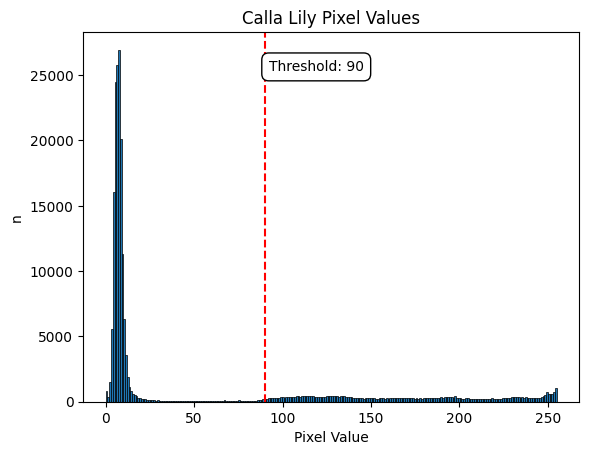

In [42]:
# Test printing out the pixel values of each image (probably commented out later) and 
# plot histograms of the values
# print(calla_lily_png)
# print(arch_png)

# Histogram the Calla Lily first with it's threshold value marked by a red vertical line
calla_histo = plt.hist(calla_lily_png.ravel(), bins=256, edgecolor='black', linewidth=0.5)
plt.title('Calla Lily Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('n')
plt.axvline(x=calla_thresh_value, color='red', linestyle='--', linewidth=1.5)
plt.annotate(f'Threshold: {calla_thresh_value}',
             xy=(calla_thresh_value, plt.ylim()[1]), 
             xytext=(37, -20), 
             textcoords='offset points', 
             ha='center', va='top', 
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black'))

plt.savefig('images/homework_2/calla_histo.png')

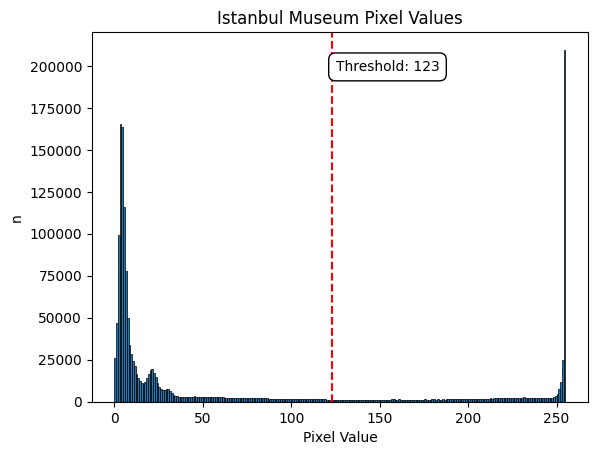

In [43]:
# Histogram the istanbul image next, with its red line as well
arch_histo = plt.hist(arch_png.ravel(), bins=256, edgecolor='black', linewidth=0.5)
plt.title('Istanbul Museum Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('n')
plt.axvline(x=arch_thresh_value, color='red', linestyle='--', linewidth=1.5)
plt.annotate(f'Threshold: {arch_thresh_value}',
             xy=(arch_thresh_value, plt.ylim()[1]), 
             xytext=(40, -20), 
             textcoords='offset points', 
             ha='center', va='top', 
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black'))

plt.savefig('images/homework_2/arch_histo.png')

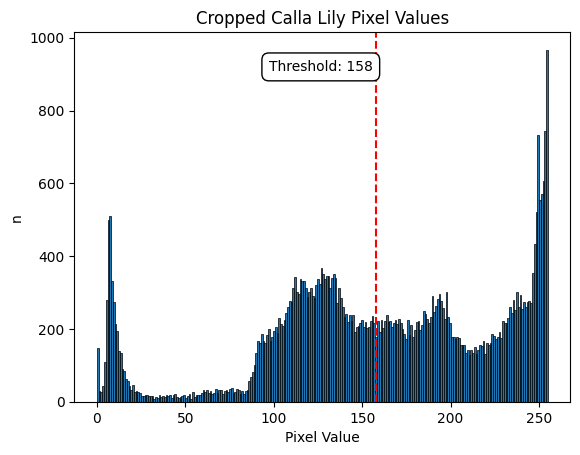

In [44]:
# Histogram the cropped calla lily last
calla_crop_histo = plt.hist(calla_lily_crop_png.ravel(), bins=256, edgecolor='black', linewidth=0.5)
plt.title('Cropped Calla Lily Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('n')
plt.axvline(x=calla_crop_thresh_value, color='red', linestyle='--', linewidth=1.5)
plt.annotate(f'Threshold: {calla_crop_thresh_value}',
             xy=(calla_crop_thresh_value, plt.ylim()[1]), 
             xytext=(-40, -20), 
             textcoords='offset points', 
             ha='center', va='top', 
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black'))

plt.savefig('images/homework_2/calla_crop_histo.png')

Now need to threshold the images and save them

In [46]:
thresh_calla = (calla_lily_png > threshold_otsu(calla_lily_png))
thresh_arch = arch_png > threshold_otsu(arch_png)
thresh_calla_crop = calla_lily_crop_png > threshold_otsu(calla_lily_crop_png)

io.imsave('images/homework_2/thresh_calla.png', thresh_calla)
io.imsave('images/homework_2/thresh_arch.png', thresh_arch)
io.imsave('images/homework_2/thresh_calla_crop.png', thresh_calla_crop)

C:\Users\bretb\AppData\Local\Temp\ipykernel_21696\3716643570.py:5: UserWarning: images/homework_2/thresh_calla.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('images/homework_2/thresh_calla.png', thresh_calla)
C:\Users\bretb\AppData\Local\Temp\ipykernel_21696\3716643570.py:6: UserWarning: images/homework_2/thresh_arch.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('images/homework_2/thresh_arch.png', thresh_arch)
C:\Users\bretb\AppData\Local\Temp\ipykernel_21696\3716643570.py:7: UserWarning: images/homework_2/thresh_calla_crop.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('images/homework_2/thresh_calla_crop.png', thresh_calla_crop)


## Problem 2 (Thresholding, again.) <br>
### Using global *and* adaptive thresholding

In [46]:
# Importing my new image, that of Marc Chagall's 'I and the Village.'
village_jpg = plt.imread('images/homework_2/village.jpg', 'gray')
# plt.imshow(village_jpg, 'gray')
# print(village_jpg)
# print(village_jpg.shape)

# Convert to grayscale
gray_village = np.dot(village_jpg[...,:3], [0.2989, 0.5870, 0.1140])
# print(gray_village) # Confirm values
# print(gray_village.dtype, np.max(gray_village)) # Check types

# Calculate threshold values using otus and adaptive (local)
gray_village_otsu = threshold_otsu(gray_village)
gray_village_adap = threshold_local(gray_village, 37, offset=0, method='gaussian')

# print('Otsu: ', gray_village_otsu, '; ', 'Adaptive: ', gray_village_adap)

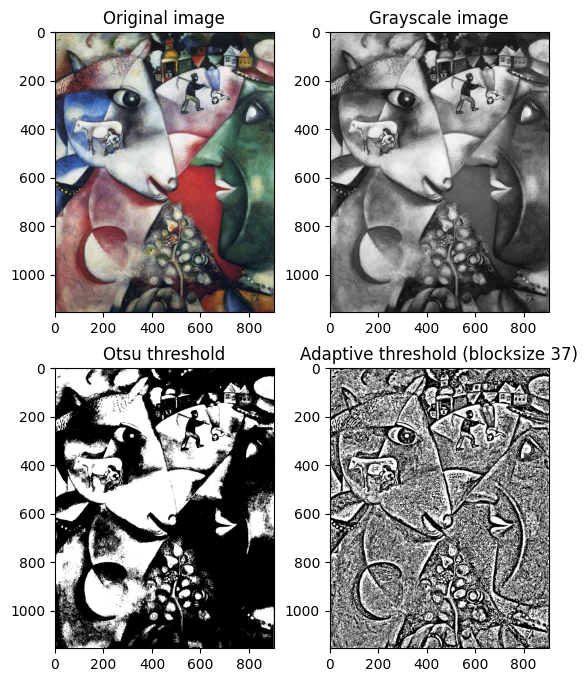

In [47]:
# Apply the threshold to the image and visualize them
otsu_village = gray_village > gray_village_otsu
adap_village = gray_village > gray_village_adap

fig, axes = plt.subplots(2, 2, figsize=(6.5, 8))
ax = axes.ravel()

ax[0].imshow(village_jpg)
ax[0].set_title('Original image')

ax[1].imshow(gray_village, cmap='gray')
ax[1].set_title('Grayscale image')

ax[2].imshow(otsu_village, cmap='gray')
ax[2].set_title('Otsu threshold')

ax[3].imshow(adap_village, cmap='gray')
ax[3].set_title('Adaptive threshold (blocksize 37)')

plt.tight_layout

plt.savefig('images/homework_2/village_grid.png')

## Problem 3 (Protein density.)
### Local region intensity and comparisons

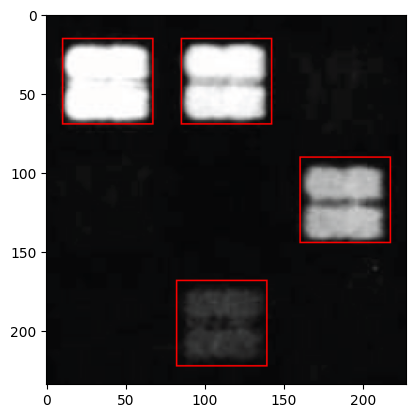

In [30]:
protein_img = io.imread('images/homework_2/microarray_crop.png')
# plt.imshow(protein_img)
# print(protein_img)

# # Convert to a numpy array
protein_array = np.array(protein_img)

# Draw some boxes to help define areas to check intensity
# First define their dimensions
boxes = [
    (10, 68, 15, 70),
    (85, 143, 15, 70),
    (160, 218, 90, 145),
    (82, 140, 168, 223)
]

# Draw lines that make the boxes using the coordinates in boxes vector
for (xmin, xmax, ymin, ymax) in boxes:
    # Top and bottom borders
    protein_array[ymin, xmin:xmax, 0] = 255  # Top border red
    protein_array[ymin, xmin:xmax, 1] = 0
    protein_array[ymin, xmin:xmax, 2] = 0

    protein_array[ymax-1, xmin:xmax, 0] = 255  # Bottom border red
    protein_array[ymax-1, xmin:xmax, 1] = 0
    protein_array[ymax-1, xmin:xmax, 2] = 0

    # Left and right borders
    protein_array[ymin:ymax, xmin, 0] = 255  # Left border red
    protein_array[ymin:ymax, xmin, 1] = 0
    protein_array[ymin:ymax, xmin, 2] = 0

    protein_array[ymin:ymax, xmax-1, 0] = 255  # Right border red
    protein_array[ymin:ymax, xmax-1, 1] = 0
    protein_array[ymin:ymax, xmax-1, 2] = 0

# Display the image with the red boxes
plt.imshow(protein_array)
plt.show()

#### Now that the boxes fit where I want, I can use the coordinates to define where we'll look for intensities

In [34]:
# Note that the x lims need to be the y coords and the y lims need to be the x coords:
roi0 = protein_array[boxes[0][2]:boxes[0][3], boxes[0][0]:boxes[0][1]].ravel()
roi1 = protein_array[boxes[1][2]:boxes[1][3], boxes[1][0]:boxes[1][1]].ravel()
roi2 = protein_array[boxes[2][2]:boxes[2][3], boxes[2][0]:boxes[2][1]].ravel()
roi3 = protein_array[boxes[3][2]:boxes[3][3], boxes[3][0]:boxes[3][1]].ravel()

# Calc and print their means
print('Region A: ', np.mean(roi0))
print('Region B: ', np.mean(roi1))
print('Region C: ', np.mean(roi2))
print('Region D: ', np.mean(roi3))

Region A:  196.5226750261233
Region B:  178.24367816091953
Region C:  121.51389759665622
Region D:  38.23469174503657


In [36]:
# Ratio calculations
print('C is ', np.mean(roi2) / np.mean(roi3), ' times more dense than D.')
print('A is ', np.mean(roi0) / np.mean(roi3), ' times more dense than D.')

C is  3.178105852322728  times more dense than D.
A is  5.139904784288861  times more dense than D.


(a) The ratio calculated using python states that the Region C is about 3.18 times more dense than Region D. <br>
(b) Since intensity is proportional to density, Region A is about 5.14 times more dense than Region D. <br><br>

I checked these with values in ImageJ and get approximate ratios of 3.63 and 5.22 respectively.

## Problem 4 (Non-uniform backgrond subtraction)

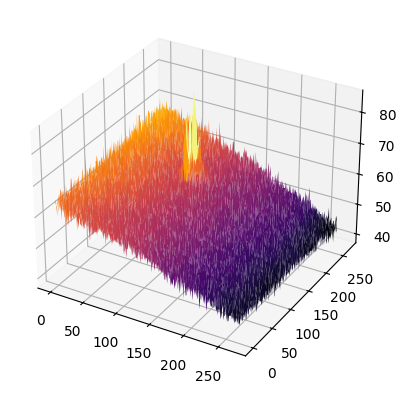

In [58]:
#(a)
# Import new image
bead_img = io.imread('images/homework_2/GUV24_bead_crop.png')

# convert to 2D array and extract x and y values
bead_2d = bead_img[:, :, 0]
height, width = bead_2d.shape

x = np.arange(0, width)
y = np.arange(0, height)
x, y = np.meshgrid(x, y)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, bead_2d, cmap='inferno') 

In [ ]:
# (b)


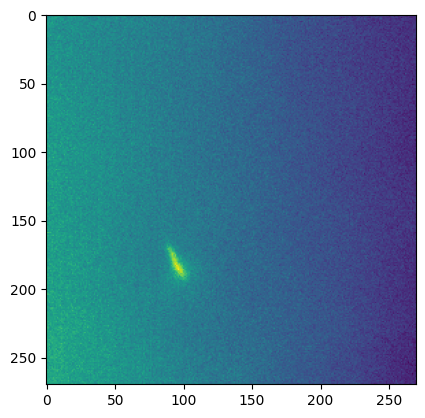